# Расчётное задание по математической статистике

In [3]:
# N(0, 1), Стюдента, Хи-квадрат, Фишера
from scipy.stats import norm, nct, chi2, f, ecdf

import matplotlib.pyplot as plt
from math import sqrt
import numpy as np


## Нормальная совокупность

In [4]:
# Date
a = -1       # Среднее a
sigma2 = 0.9 # Дисперсия σ^2
eps = 0.07   # Ошибка ε

Xn = np.array([-1.126, -1.432, -0.156 , 0.260, -1.389, 0.674, -1.331, -0.395 , 1.043, -2.331, \
              -1.044, -1.231, -1.225, -0.177, -0.938, -0.606, -1.210, -0.258, -1.013, -1.805, \
              -0.143, -2.986, -0.448, -1.131 , -2.545, -0.554, -2.940, -2.282, -0.198, 0.463, \
              -1.917, -1.150, 0.325, -2.808, -1.485, -2.663, -0.567, -1.331, 0.409, -0.661, \
              -0.818, 0.786, -0.755, 0.749, -1.250, -2.619, -0.867, -0.898, -0.632, -1.276])
n = Xn.size   # объем выборки = 50
X_ =  np.average(Xn)
print("Выборочное среднее:", X_)

S = np.average(Xn*Xn) - X_**2   # Выборочная дисперсия
print("S:", S)

S_0 = (n/(n-1))*S   # Несмещенная выборочная дисперсия
print("S0:", S_0)

S_1 = Xn - a*np.ones(n)
S_1 = sum(S_1*S_1)/n  # выборочная дисперсия при известном мат ожидании
print("S1:", S_1)

print("Квантили")
q_n = round(norm.ppf(1 - eps/2), 4) # квантиль станд. норм. уровня 1 - eps/2 = 0.965
print("N(0, 1):", q_n)

# Распределение Стьюдента (n = 50, несмещёное)
st = nct(df = n - 1, nc = 0)  # где df - параметр степеней свободы, а nc - параметр нецентральности
q_s = round(st.ppf(1 - eps/2), 4) # квантиль Стьюдента уровня 1 - eps/2 = 0.965
print("T(49):  ", q_s)  # распределение Стьюдента со степенью свободны n-1 = 49

# Распределение Хи-квадрат (n = 50)
ch = chi2(df = n - 1)
print("\nХи^2(49)")
q_chi_1 = round(ch.ppf(eps/2), 3) # квантиль Хи-квадрат уровня eps/2 = 0.035
print("e/2    :", q_chi_1)
q_chi_2 = round(ch.ppf(1 - eps/2), 3) # квантиль Хи-квадрат  уровня 1 - eps/2 = 0.965
print("1 - e/2:", q_chi_2)


Выборочное среднее: -0.95764
S: 1.0060174303999998
S0: 1.0265483983673467
S1: 1.0078118000000003
Квантили
N(0, 1): 1.8119
T(49):   1.8524

Хи^2(49)
e/2    : 32.656
1 - e/2: 68.38


Строим доверительные интервалы

In [5]:
# A - α, (σ известно)
offset = q_n*sqrt(sigma2)/sqrt(n)

L = round(X_ - offset, 3)
R = round(X_ + offset, 3)
print(L, "<=", a, "<=", R)


-1.201 <= -1 <= -0.715


In [6]:
# Б - α, (σ неизвестно)

offset = q_s*S_0/sqrt(n)

L = round(X_ - offset, 3)
R = round(X_ + offset, 3)
print(L,"<=", a, "<=", R)


-1.227 <= -1 <= -0.689


In [7]:
# В - σ^2, (α известно)

L = round(n*S_1/q_chi_2, 3)
R = round(n*S_1/q_chi_1, 3)
print(L,"<=", sigma2, "<=", R)


0.737 <= 0.9 <= 1.543


In [8]:
# Г - σ^2, (α неизвестно)

L = round(n*S/q_chi_2, 3)
R = round(n*S/q_chi_1, 3)
print(L,"<=", sigma2, "<=", R)


0.736 <= 0.9 <= 1.54


##Гипотиза о равномерности выборки (U[0, 1])


In [9]:
# Date
Xu = np.array([0.552, 0.822, 0.667, 0.754, 0.641, 0.322, 0.087, 0.684, 0.618, 0.768,\
              0.790, 0.865, 0.437, 0.322, 0.293, 0.198, 0.902, 0.218, 0.562, 0.226,\
              0.060, 0.149, 0.134, 0.698, 0.746, 0.447, 0.175, 0.802, 0.398, 0.581])

Xu = np.sort(Xu) # отсортировано для удобства нахождения эмпирической функции
n = Xu.size   # объем выборки = 30

print("Выборочное среднее:", np.average(Xu))

K = 5 # кол-во интервалов для Хи-квадрат

q_k = 1.3 # квантиль Колмогорова уровня 1 - eps = 0.93 (eps = 0.07). взял из таблицы

ch = chi2(df = K - 1)
q_ch = ch.ppf(1 - eps) # квантиль Хи-квадрат уровня 1 - eps = 0.93


Выборочное среднее: 0.49726666666666663


[0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
 0.23333333 0.26666667 0.3        0.36666667 0.36666667 0.4
 0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
 0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
 0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ]


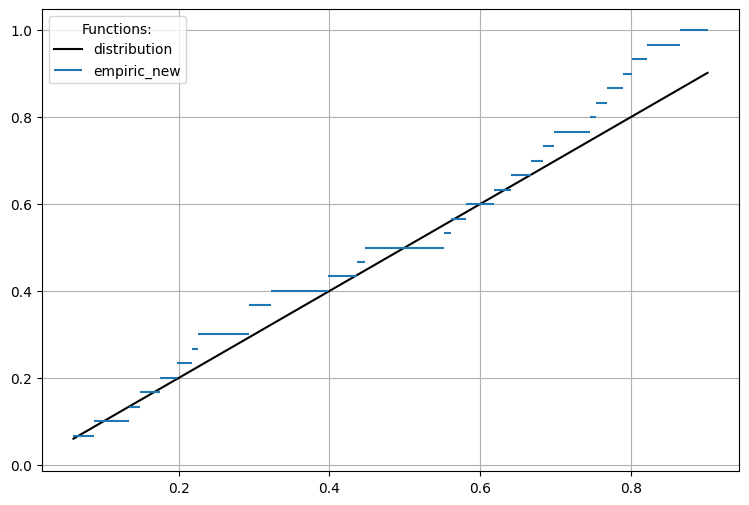

Выборка равномерная

РДУЗ (по таблице):
d = 0.6098
РДУЗ = 1 - K(d): 0.984


In [10]:
# A
# Критерий Колмогорова

plt.figure(figsize=(9,6))

# График функции распределения
plt.plot(Xu,Xu, label="distribution", color = "black")

# Эмпирическое распределение и массив его значений
def empirical_distribution(x):
    count = np.zeros_like(x)
    for i, val in enumerate(x):
        count[i] = np.sum(x <= val)
    return count / len(x)

empirical_values = empirical_distribution(Xu)
print(empirical_values)

plt.hlines(empirical_values[0], Xu[0], Xu[0], label="empiric_new")
for j in range(n-1):
    plt.hlines(empirical_values[j+1], Xu[j], Xu[j+1])


plt.legend(title='Functions:')
plt.grid()
plt.show()

D = sqrt(n) * max(abs(empirical_values - Xu)) # Статистика Колмогорова (расстояние Колмогорова * sqrt(n))

if D < q_k:
    print("Выборка равномерная")
else:
    print("Выборка НЕ равномерная")

print("\nРДУЗ (по таблице):")
print("d =", round(D, 4))
print("РДУЗ = 1 - K(d):", 1-0.016)  # K(d) = 0.016. взято из таблицы


In [11]:
# Б
# Критерий Хи-квадрат (асимптотического размера eps)

def getMu(Split):
    Mu = []
    c = 0; i = 0
    for s in Split:
        while Xu[i] <= s:
            c+=1;
            if i < n-1:i+=1
            else: break
        Mu.append(c)
        c=0

    return Mu[1:]


Spl = np.linspace(0, 1, K+1)  # Равномерное разбиение
p = Spl[1]  # Вероятность попасть в один из интервалов
M = getMu(Spl)  # Количество элементов выборки в каждом из интервалов

print(n, K)
print(Xu)
print(Spl)
print("-" * 80)
print(M, "\n")
print(Array_F_empirical)

# Статистика Хи-квадрат
D = 0
n_p = n*p
for i in range(K):
    D += (M[i] - n_p)**2
D /= (n_p)

if D < q_ch: print("\nВыборка равномерная")
else: print("\nВыборка НЕ равномерная")

print()
print("Квантиль:", round(q_ch, 4))
print("d:", round(D, 4));
print("РДУЗ:",  1 - ch.cdf(D))


30 5
[0.06  0.087 0.134 0.149 0.175 0.198 0.218 0.226 0.293 0.322 0.322 0.398
 0.437 0.447 0.552 0.562 0.581 0.618 0.641 0.667 0.684 0.698 0.746 0.754
 0.768 0.79  0.802 0.822 0.865 0.902]
[0.  0.2 0.4 0.6 0.8 1. ]
--------------------------------------------------------------------------------
[6, 6, 5, 9, 4] 



NameError: name 'Array_F_empirical' is not defined

##Гипотизы о двух нормальных выборках  (N(α, σ^2))

In [12]:
X = Xn[:20]; n = X.size # первые 20 наблюдений
print(X)
X_ =  np.average(X)
Y = Xn[20:]; m = Y.size # последние 30 наблюдений
print(Y)
Y_ =  np.average(Y)
print("Выборочные средние:")
print("X:",X_)
print("Y:",Y_)


# Несмещённая выборочная дисперсия ( S^2_0 )
S0_X = X - X_*np.ones(n)
S0_X = sum(S0_X*S0_X)/(n - 1)

S0_Y = Y - Y_*np.ones(m)
S0_Y = sum(S0_Y*S0_Y)/(m - 1)

print("Несмещённая выборочная дисперсия:")
print("S0_X:", S0_X)
print("S0_Y:", S0_Y)
print()


# Распределение Фишера (n = 20, m = 30)
fi = f(dfn = n-1, dfd = m-1)
# Распределение Стьюдента
st = nct(df = m+n-2, nc = 0)

print("Квантили")
q_s = round(st.ppf(1 - eps/2),4) # квантиль Стьюдента уровня 1 - eps/2 = 0.965
print("T:         ", q_s)
f1 = round(fi.ppf(eps/2), 3)  # квантиль Фишера уровня eps/2 = 0.035
print("F{e/2}:    ", f1)
f2 = round(fi.ppf(1 - eps/2),3) # квантиль Фишера уровня 1 - eps/2 = 0.965
print("F{1 - e/2}:", f2)


[-1.126 -1.432 -0.156  0.26  -1.389  0.674 -1.331 -0.395  1.043 -2.331
 -1.044 -1.231 -1.225 -0.177 -0.938 -0.606 -1.21  -0.258 -1.013 -1.805]
[-0.143 -2.986 -0.448 -1.131 -2.545 -0.554 -2.94  -2.282 -0.198  0.463
 -1.917 -1.15   0.325 -2.808 -1.485 -2.663 -0.567 -1.331  0.409 -0.661
 -0.818  0.786 -0.755  0.749 -1.25  -2.619 -0.867 -0.898 -0.632 -1.276]
Выборочные средние:
X: -0.7845
Y: -1.0730666666666668
Несмещённая выборочная дисперсия:
S0_X: 0.6912322631578947
S0_Y: 1.2471796505747126

Квантили
T:          1.8532
F{e/2}:     0.446
F{1 - e/2}: 2.098


In [13]:
# A (совпадение дисперсий при неизвестных средних)
# Критерий Фишера

D = S0_X/S0_Y # Статистика Фишера

if f1<=D and D<=f2: print("Дисперсии совпали")
else: print("Дисперсии НЕ совпали")
print('d:', D)


Дисперсии совпали
d: 0.5542363226014536


In [14]:
# Б (совпадение средних при одной и той же неизвестной дисперсии)
# Критерий Стьюдента

Sq = sqrt((n*m)/(n + m))
Denom = ( (n-1)*S0_X + (m-1)*S0_Y ) / (n+m-2)

D = Sq*(X_ - Y_)/sqrt(Denom) # Статистика Стьюдента

if abs(D) <= q_s: print("Мат. ожидания совпали")
else: print("Мат. ожидания НЕ совпали")
print('|d|:', abs(D))


Мат. ожидания совпали
|d|: 0.9863403430537296
